### Comparação de ROI entre Canais de Marketing
**Objetivo:** Avaliar qual canal gera maior retorno sobre investimento (ROI).

* Podemos criar um gráficos de barras para comparar o ROI para cada caso.

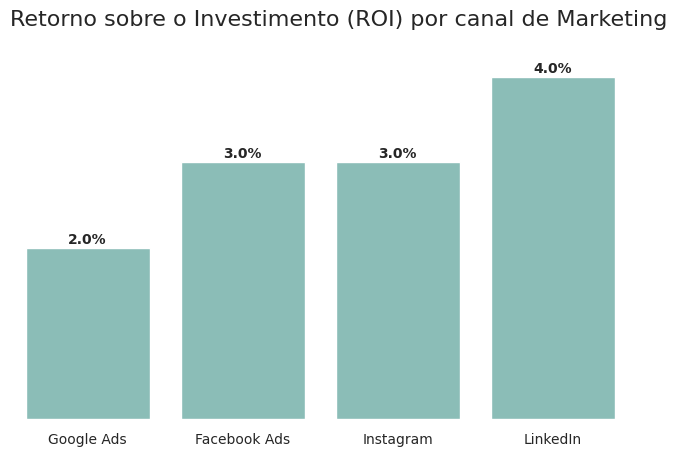

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dados
df = pd.DataFrame( {'Canal':        ['Google Ads', 'Facebook Ads', 'Instagram', 'LinkedIn'],
                    'Investimento': [5000, 3000, 2000, 1000],
                    'Receita':      [15000, 12000, 8000, 5000]} )

df['ROI'] = (df['Receita'] - df['Investimento']) / df['Investimento']

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(8,5))
sns.set_theme(style="white")

# Gerando o gráfico de colunas
ax = sns.barplot(data=df, x='Canal', y = 'ROI', color="#83c5be")

## Personalizando o gráfico
ax.set_title('Retorno sobre o Investimento (ROI) por canal de Marketing', fontsize=16, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=10)
sns.despine(left = True, bottom = True)
ax.set_ylim(0, 4.5)

# Escrevendo os valores de cada barra no gráfico
for i, valor in enumerate(df['ROI']):
    qtd = f'{valor:.1f}%'
    offset = 0.05  # offset
    ax.text(i, valor + offset, qtd, fontsize=10, fontweight='bold', ha='center')

plt.show()

### Acompanhamento de Campanhas de Marketing

**Objetivo:** Monitorar o desempenho de campanhas como, por exemplo, a taxa de cliques (CTR) ao longo do tempo.

* Podemos criar um gráfico de linhas para tendências com mais intervalos de tempo ou colunas para menores.
* Gráficos empilhados ou agrupados para comparar métricas entre diferentes campanhas.

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

# Dados
df = pd.DataFrame({'Data': pd.date_range(start='2024-01-01', periods=4, freq='ME'),
        'Campanha_A': [200, 190, 250, 300],
        'Campanha_B': [180, 210, 230, 280]} )

df_melted = df.melt(id_vars='Data', var_name='Campanha', value_name='CTR')
df_melted["Mês"] = df_melted["Data"].dt.month_name()

# Gráfico de linha
fig = px.bar(df_melted, x='Mês', y='CTR', color='Campanha', text ='CTR', barmode='group', title='CTR por Campanha')

# Personalizando o gráfico
fig.update_layout(width=1000, height=500, font_family = 'DejaVu Sans', font_size=15,
                  font_color= '#6c757d', title_font_color= 'black', title_font_size=24,
                  title_text='Taxa de cliques (CTR) por Campanha' +
                             '<br><sup size=1 style="color:#555655">Para as Campanhas A e B da empresa no 1º Tri de 2024</sup>',
                  title_pad_l = 50, plot_bgcolor= "white", yaxis_range=[0,330], hovermode="closest",
                  xaxis_title ='', yaxis_title = '')

# Retirando os ticks do eixo y
fig.update_yaxes(showticklabels=False)

fig.show()

### Análise de Taxa de Conversão
**Objetivo:** Visualizar as taxas de conversão em diferentes etapas do funil de vendas.

* Um gráfico de funil pode ser interessante mostrando as conversões por etapa e o percentual

In [ ]:
from plotly import graph_objects as go

# Dados
df = pd.DataFrame({'Etapa': ['Visitas', 'Leads', 'Propostas', 'Vendas'],
        'Quantidade': [2000, 300, 140, 50]})

# Gráfico de funil
fig = go.Figure(go.Funnel(x = df['Quantidade'], y = df['Etapa'], textinfo = "value+percent previous"))
fig.update_layout(width=1000, height=500, font_family = 'DejaVu Sans', font_size=15,
                  font_color= '#6c757d', title_font_color= 'black', title_font_size=24,
                  title_text='Taxa de Conversão no Funil de Vendas' +
                             '<br><sup size=1 style="color:#555655">No site da empresa em Janeiro de 2024</sup>',
                  title_pad_l = 50, plot_bgcolor= "white")

fig.show()

### Previsão de Vendas
**Objetivo:** Prever vendas futuras com base em dados históricos e visualizar a projeção.

* Um gráfico de linha para séries temporais para prever vendas, trazendo os dados reais e previstos juntos.

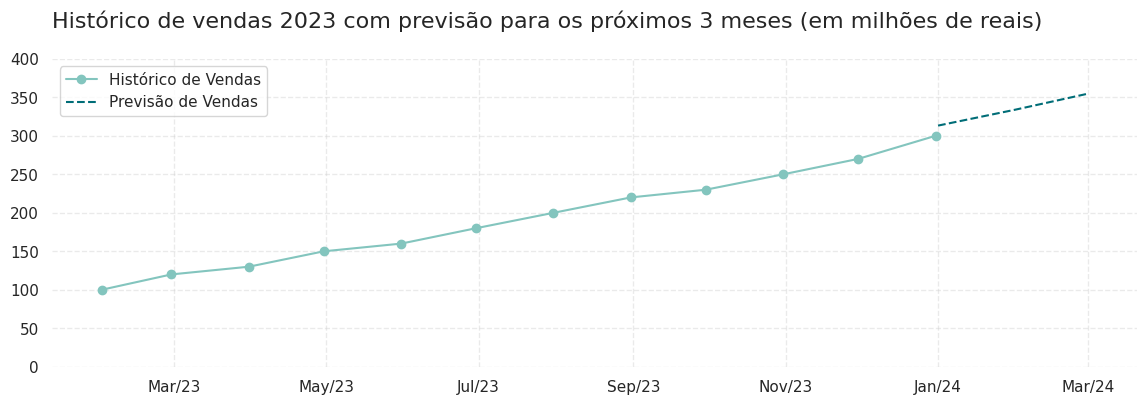

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Dados
df = pd.DataFrame({'Mes': pd.date_range(start='2023-01-01', periods=12, freq='ME'),
        'Vendas': [100, 120, 130, 150, 160, 180, 200, 220, 230, 250, 270, 300]} )

# Criando modelo Holt-Winters
model = ExponentialSmoothing(df['Vendas'], seasonal=None, trend='additive').fit()

# Criando novas datas para previsões (3 meses)
future_dates = pd.date_range(start=df['Mes'].iloc[-1] + pd.Timedelta(days=1), periods=3, freq='MS')
future_predictions = model.forecast(steps=3)

# Preparando para visualização
future_df = pd.DataFrame({'Mes': future_dates, 'Previsao': future_predictions})
combined_df = pd.concat([df, future_df], ignore_index=True)

# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(14,4))

# Visualização
ax.plot(df['Mes'], df['Vendas'], label='Histórico de Vendas', color="#83c5be", marker='o')
ax.plot(future_df['Mes'], future_df['Previsao'], label='Previsão de Vendas', linestyle='--', color='#006d77')
ax.set_title('Histórico de vendas 2023 com previsão para os próximos 3 meses (em milhões de reais)\n', fontsize = 16, loc='left')
ax.set_xlabel('')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%y'))

ax.set_ylabel('')
ax.set_ylim(0, 400)
ax.grid(True, linestyle='--', alpha = 0.4)
ax.set_frame_on(False)
ax.legend()
plt.show()